In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the features dataframe from CSV
playlists_df = pd.read_csv('/content/drive/MyDrive/Spotify_Data/playlist_df.csv')
tracks_df = pd.read_csv('/content/drive/MyDrive/Spotify_Data/final_tracks_data.csv')
ratings_df = pd.read_csv('/content/drive/MyDrive/Spotify_Data/ratings_df.csv')
complete_feature_set = pd.read_csv('/content/drive/MyDrive/Spotify_Data/complete_feature.csv')

In [2]:
def remove_unnamed_columns(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

playlists_df = remove_unnamed_columns(playlists_df)
tracks_df = remove_unnamed_columns(tracks_df)
ratings_df = remove_unnamed_columns(ratings_df)
complete_feature_set = remove_unnamed_columns(complete_feature_set)


In [3]:
tracks_df['genres'] = tracks_df['genres'].str.replace("^\[\]$", "['unknown']", regex=True)
unknown = tracks_df[tracks_df['genres'] == "['unknown']"]

In [ ]:
len(unknown)

39042

In [ ]:
playlists_df.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
0,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37
1,Awesome Playlist,False,1,1506556800,39,23,1,5,11656470,21
2,korean,False,2,1505692800,64,51,1,18,14039958,31
3,mat,False,3,1501027200,126,107,1,4,28926058,86
4,90s,False,4,1401667200,17,16,2,7,4335282,16


In [ ]:
tracks_df.head()

,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,track_id,genres,artist_popularity,release_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,2209,"['dance pop', 'hip hop', 'hip pop', 'neo soul'...",69,2005-07-04,...,-5.370,0.0,0.0308,0.098100,0.0198,0.4340,0.549,122.973,267355.0,4.0
1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,26dSoYclwsYLMAKD3tpOr4,Toxic,0z7pVBGOD7HCIB7S8eLkLI,In The Zone,27709,"['dance pop', 'pop']",78,2003-11-13,...,-8.205,0.0,0.3640,0.075100,0.0000,0.1280,0.584,175.906,239320.0,4.0
2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,6vWDO969PvNqNYHIOW5v0m,Crazy In Love,25hVFAxTlDvXbx2X2QkUkE,Dangerously In Love (Alben für die Ewigkeit),2383,"['pop', 'r&b']",85,2003-06-23,...,-8.811,1.0,0.0453,0.000064,0.8320,0.1170,0.651,121.035,371572.0,4.0
3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,31TPClRtHm23RisEBtV3X7,Rock Your Body,6QPkyl04rXwTGlGlcYaRoW,Justified,5177,"['dance pop', 'pop']",77,2002-11-04,...,-3.175,0.0,0.1300,0.067900,0.0947,0.3910,0.136,129.095,254853.0,4.0
4,Shaggy,1lzr43nnXAijIGYnCT8M8H,5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,6NmFmPX56pcLBOFMhIiKvF,Hot Shot,7784,"['dance pop', 'pop rap', 'reggae fusion']",71,2000-01-01,...,-2.404,0.0,0.1210,0.001740,0.6510,0.0255,0.313,176.046,227280.0,4.0


In [ ]:
ratings_df

,pid,track_id,pos,num_followers
0,0,2209,0,1
1,0,27709,1,1
2,0,2383,2,1
3,0,5177,3,1
4,0,7784,4,1
...,...,...,...,...
1940989,29999,11111,242,1
1940990,29999,24445,243,1
1940991,29999,16631,244,1
1940992,29999,17812,245,1


In [4]:
merged_df = pd.merge(ratings_df, tracks_df, on='track_id')

In [ ]:
merged_df

,pid,track_id,pos,num_followers,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,2209,0,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,...,-5.370,0.0,0.0308,0.0981,0.019800,0.4340,0.5490,122.973,267355.0,4.0
1,123,2209,73,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,...,-5.370,0.0,0.0308,0.0981,0.019800,0.4340,0.5490,122.973,267355.0,4.0
2,218,2209,14,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,...,-5.370,0.0,0.0308,0.0981,0.019800,0.4340,0.5490,122.973,267355.0,4.0
3,342,2209,42,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,...,-5.370,0.0,0.0308,0.0981,0.019800,0.4340,0.5490,122.973,267355.0,4.0
4,382,2209,1,2,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,...,-5.370,0.0,0.0308,0.0981,0.019800,0.4340,0.5490,122.973,267355.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940930,29997,322564,82,1,Olivia Penalva,6sifTSpWzBr2WfXrzX3lnw,6ytGxUYeXamODJwiXuZvjO,Skyline,4QnTenYw3qy3u3qaHyNgXx,Weightless,...,-16.224,1.0,0.0339,0.7010,0.841000,0.3010,0.0461,88.320,178800.0,3.0
1940931,29997,319090,93,1,Dan Talevski,3Jg2JhI8ykraUjO4Qk4LPC,0Vu4A064M7J86SoMA0nrJH,My Religion,7yk6wYsl2WVlBMsz2OLaXa,High Times,...,-9.448,1.0,0.1520,0.0951,0.000000,0.1140,0.2960,127.915,240040.0,4.0
1940932,29997,321712,94,1,Adele,5xIYF3JwqNSqQG2TtlfrYq,4dpARuHxo51G3z768sgnrY,Water Under The Bridge,0vT3XBE3jdXc2uDmutViig,25,...,-11.304,1.0,0.0893,0.9240,0.000044,0.0976,0.8600,168.707,132440.0,4.0
1940933,29997,317864,129,1,Stanaj,23L6jhZ95pj6Wr5HwVBVil,3zrUX1hQrUB9aXcOiyQLmN,Find Me,2ekHnPrPK0Fqxt0mSGDbZs,From A Distance,...,-10.207,1.0,0.0284,0.2080,0.000000,0.0920,0.3200,95.275,290893.0,3.0


In [5]:
merged_df = merged_df.sort_values(by=['pid', 'pos'])
merged_df

,pid,track_id,pos,num_followers,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,2209,0,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,...,-5.370,0.0,0.0308,0.098100,0.019800,0.4340,0.549,122.973,267355.0,4.0
203,0,27709,1,1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,26dSoYclwsYLMAKD3tpOr4,Toxic,0z7pVBGOD7HCIB7S8eLkLI,In The Zone,...,-8.205,0.0,0.3640,0.075100,0.000000,0.1280,0.584,175.906,239320.0,4.0
578,0,2383,2,1,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,6vWDO969PvNqNYHIOW5v0m,Crazy In Love,25hVFAxTlDvXbx2X2QkUkE,Dangerously In Love (Alben für die Ewigkeit),...,-8.811,1.0,0.0453,0.000064,0.832000,0.1170,0.651,121.035,371572.0,4.0
1063,0,5177,3,1,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,31TPClRtHm23RisEBtV3X7,Rock Your Body,6QPkyl04rXwTGlGlcYaRoW,Justified,...,-3.175,0.0,0.1300,0.067900,0.094700,0.3910,0.136,129.095,254853.0,4.0
1313,0,7784,4,1,Shaggy,1lzr43nnXAijIGYnCT8M8H,5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,6NmFmPX56pcLBOFMhIiKvF,Hot Shot,...,-2.404,0.0,0.1210,0.001740,0.651000,0.0255,0.313,176.046,227280.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833602,29999,11111,242,1,Gucci Mane,2XaInsPPUkZRkY4uFJ3AHK,13y7CgLHjMVRMDqxdx0Xdo,Met Gala (feat. Offset),0smWYh2nQsaZNonBGZpZMn,Droptopwop,...,-2.586,0.0,0.0445,0.006930,0.000000,0.2860,0.381,97.491,202027.0,4.0
880530,29999,24445,243,1,21 Savage,5ZIZgRrrDj60O0F5oA9bVz,1URnnhqYAYcrqrcwql10ft,Bad Business,4QUNWTw2FsIz722xjUjFJw,Issa Album,...,-7.610,1.0,0.0280,0.119000,0.008500,0.1820,0.215,127.054,187667.0,4.0
62173,29999,16631,244,1,Tee Grizzley,3muBQDekYAg7jm6hDu6R0Z,6AUl0ykLLpvTktob97x9hO,First Day Out,6074OsmUN1PdFgy0zTP4Fn,My Moment,...,-7.299,1.0,0.0343,0.096000,0.000911,0.2050,0.293,150.093,227080.0,4.0
726664,29999,17812,245,1,Lil Pump,43ZyHQITOjhciSUUNPVRHc,3wyVrVrFCkukjdVIdirGVY,Gucci Gang,2VVvm4zJlUQm9XmBCvGN6z,Lil Pump,...,-16.270,1.0,0.0365,0.885000,0.000000,0.1090,0.103,85.055,180400.0,4.0


In [6]:
unique_ratings_track_ids = ratings_df['track_id'].nunique()
unique_tracks_track_ids = tracks_df['track_id'].nunique()

print(f"Unique track IDs in ratings_df: {unique_ratings_track_ids}")
print(f"Unique track IDs in tracks_df: {unique_tracks_track_ids}")

Unique track IDs in ratings_df: 323401
Unique track IDs in tracks_df: 323358


In [ ]:
#There are around 50 tracks, not present in tracks_df, hence removing it from database

In [7]:
merged_df = pd.merge(merged_df, playlists_df, on='pid')

In [ ]:
merged_df

,pid,track_id,pos,num_followers_x,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,...,time_signature,name,collaborative,modified_at,num_tracks,num_albums,num_followers_y,num_edits,duration_ms_y,num_artists
0,0,2209,0,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,...,4.0,Throwbacks,False,1493424000,52,47,1,6,11532414,37
1,0,27709,1,1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,26dSoYclwsYLMAKD3tpOr4,Toxic,0z7pVBGOD7HCIB7S8eLkLI,In The Zone,...,4.0,Throwbacks,False,1493424000,52,47,1,6,11532414,37
2,0,2383,2,1,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,6vWDO969PvNqNYHIOW5v0m,Crazy In Love,25hVFAxTlDvXbx2X2QkUkE,Dangerously In Love (Alben für die Ewigkeit),...,4.0,Throwbacks,False,1493424000,52,47,1,6,11532414,37
3,0,5177,3,1,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,31TPClRtHm23RisEBtV3X7,Rock Your Body,6QPkyl04rXwTGlGlcYaRoW,Justified,...,4.0,Throwbacks,False,1493424000,52,47,1,6,11532414,37
4,0,7784,4,1,Shaggy,1lzr43nnXAijIGYnCT8M8H,5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,6NmFmPX56pcLBOFMhIiKvF,Hot Shot,...,4.0,Throwbacks,False,1493424000,52,47,1,6,11532414,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940930,29999,11111,242,1,Gucci Mane,2XaInsPPUkZRkY4uFJ3AHK,13y7CgLHjMVRMDqxdx0Xdo,Met Gala (feat. Offset),0smWYh2nQsaZNonBGZpZMn,Droptopwop,...,4.0,rap,False,1508198400,247,160,1,17,55348350,95
1940931,29999,24445,243,1,21 Savage,5ZIZgRrrDj60O0F5oA9bVz,1URnnhqYAYcrqrcwql10ft,Bad Business,4QUNWTw2FsIz722xjUjFJw,Issa Album,...,4.0,rap,False,1508198400,247,160,1,17,55348350,95
1940932,29999,16631,244,1,Tee Grizzley,3muBQDekYAg7jm6hDu6R0Z,6AUl0ykLLpvTktob97x9hO,First Day Out,6074OsmUN1PdFgy0zTP4Fn,My Moment,...,4.0,rap,False,1508198400,247,160,1,17,55348350,95
1940933,29999,17812,245,1,Lil Pump,43ZyHQITOjhciSUUNPVRHc,3wyVrVrFCkukjdVIdirGVY,Gucci Gang,2VVvm4zJlUQm9XmBCvGN6z,Lil Pump,...,4.0,rap,False,1508198400,247,160,1,17,55348350,95


In [ ]:
merged_df.columns

Index(['pid', 'track_id', 'pos', 'num_followers_x', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'album_name', 'genres',
       'artist_popularity', 'release_date', 'release_year',
       'release_year_bucket', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms_x', 'time_signature', 'name',
       'collaborative', 'modified_at', 'num_tracks', 'num_albums',
       'num_followers_y', 'num_edits', 'duration_ms_y', 'num_artists'],
      dtype='object')

In [8]:
# Get columns with the '_y' suffix
cols_to_drop = [col for col in merged_df.columns if '_y' in col]

# Drop these columns
merged_df.drop(cols_to_drop, axis=1, inplace=True)

#rename the columns with '_x' to remove the suffix for clarity
merged_df.columns = [col.replace('_x', '') for col in merged_df.columns]


In [ ]:
merged_df.columns

Index(['pid', 'track_id', 'pos', 'num_followers', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'album_name', 'genres',
       'artist_popularity', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'name',
       'collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'num_artists'],
      dtype='object')

In [ ]:
merged_df.isna().sum()
#There are 21 playlists without playlist name.

pid                   0
track_id              0
pos                   0
num_followers         0
artist_name           0
track_uri             0
artist_uri            0
track_name            0
album_uri             0
album_name            0
genres                0
artist_popularity     0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_ms           0
time_signature        0
name                 21
collaborative         0
modified_at           0
num_tracks            0
num_albums            0
num_edits             0
num_artists           0
dtype: int64

In [9]:
merged_df['name'].fillna('Unnamed Playlist', inplace=True)
#added a placeholder

In [ ]:
#!pip install --upgrade networkx

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting the audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo']

# Computing the correlation matrix
correlation_matrix = tracks_df[audio_features].corr()


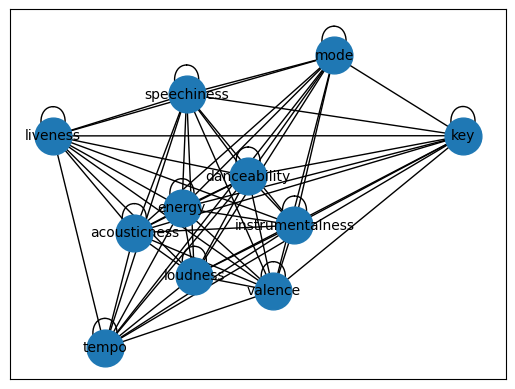

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the absolute values of the correlation matrix
# as we are interested in the magnitude of correlation
G = nx.Graph(abs(correlation_matrix))

# Draw the graph with labels
pos = nx.spring_layout(G) # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.show()


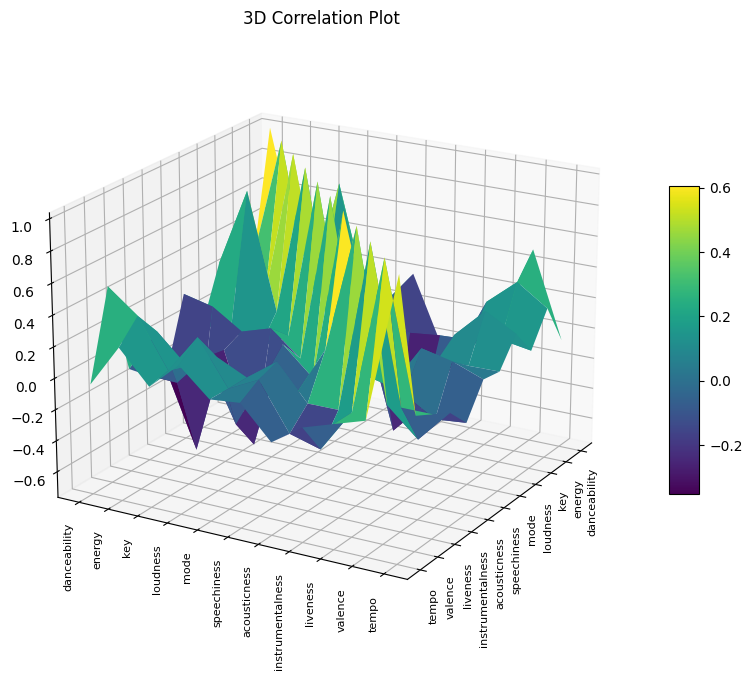

In [15]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate some sample data, replace this with your correlation_matrix
x, y = np.meshgrid(np.arange(correlation_matrix.shape[0]), np.arange(correlation_matrix.shape[1]))
z = correlation_matrix.values

# Creating the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface with a custom color map
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', rstride=1, cstride=1)

# Adding labels with decreased size
label_size = 8
ax.set_xticks(np.arange(correlation_matrix.shape[0]))
ax.set_yticks(np.arange(correlation_matrix.shape[1]))
ax.set_xticklabels(correlation_matrix.columns, rotation=90, ha='right', fontsize=label_size)
ax.set_yticklabels(correlation_matrix.columns, rotation=90, fontsize=label_size)

# Adding a title
plt.title('3D Correlation Plot')

# Adding a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Adjusting the view angle for better visibility
ax.view_init(elev=20, azim=30)

# Displaying the plot
plt.show()


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the pair grid
g = sns.PairGrid(tracks_df[audio_features], diag_sharey=False)

# Scatter plot for the upper triangle
g.map_upper(sns.scatterplot)

# Histogram on the diagonal
g.map_diag(sns.histplot)

# Density plot for the lower triangle
g.map_lower(sns.kdeplot)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

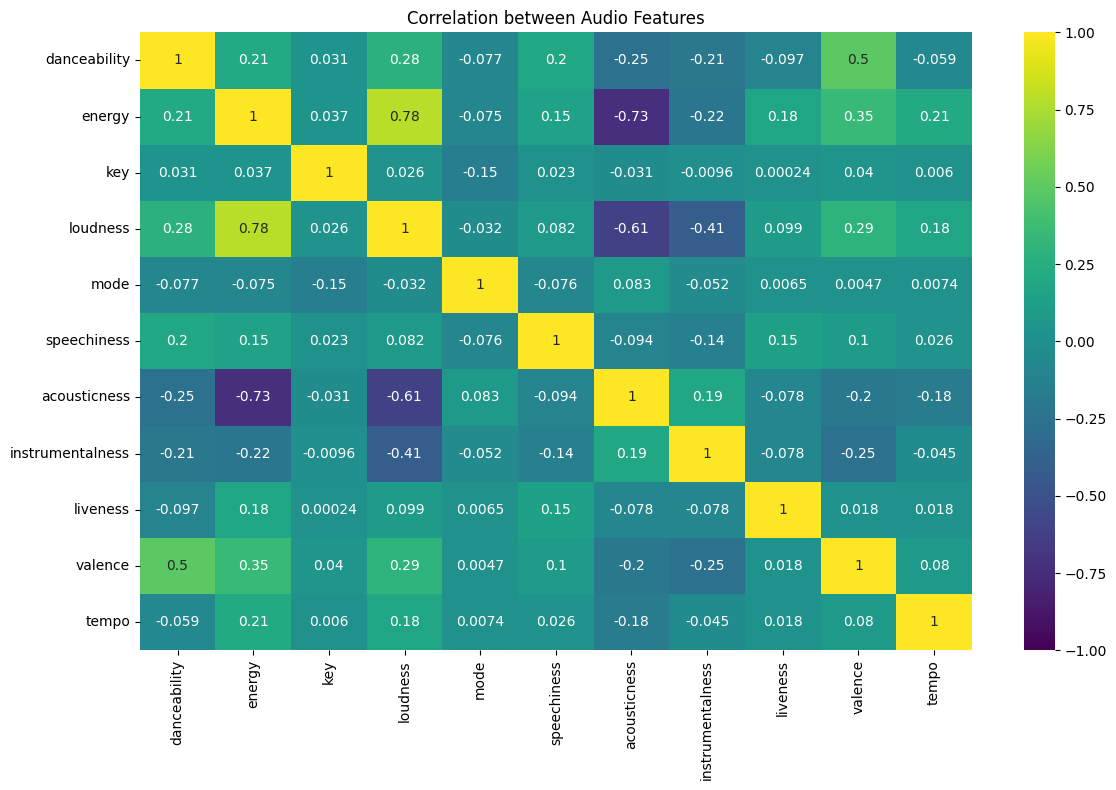

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting the audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo']

# Computing the correlation matrix
correlation_matrix = tracks_df[audio_features].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation between Audio Features')
plt.tight_layout()
plt.show()


In [ ]:
type(merged_df[0:1]['genres'])

pandas.core.series.Series

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

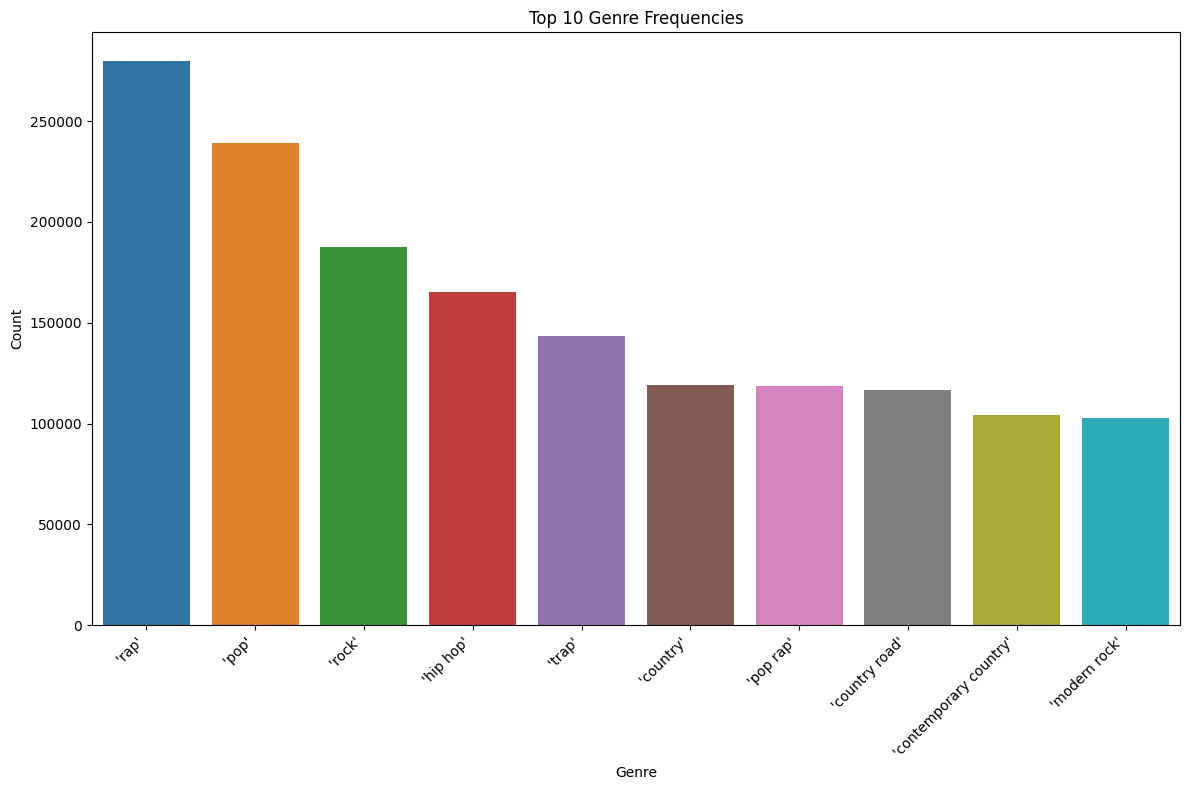

In [24]:
# Remove "[" and "]" from the 'genres' column
merged_df['genres'] = merged_df['genres'].str.replace("\[|\]", "", regex=True)

# The rest of the code remains unchanged

all_genres = merged_df['genres'].str.split(',').explode()
genre_counts = all_genres.value_counts()
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Top 10 Genre Frequencies')
plt.tight_layout()
plt.show()


In [25]:
genre_counts

 'rap'                      279972
 'pop'                      239224
 'rock'                     187477
 'hip hop'                  165226
 'trap'                     143576
                             ...  
'operetta'                       1
 'zarzuela'                      1
'polish classical piano'         1
'samoan pop'                     1
 'armenian pop'                  1
Name: genres, Length: 7256, dtype: int64

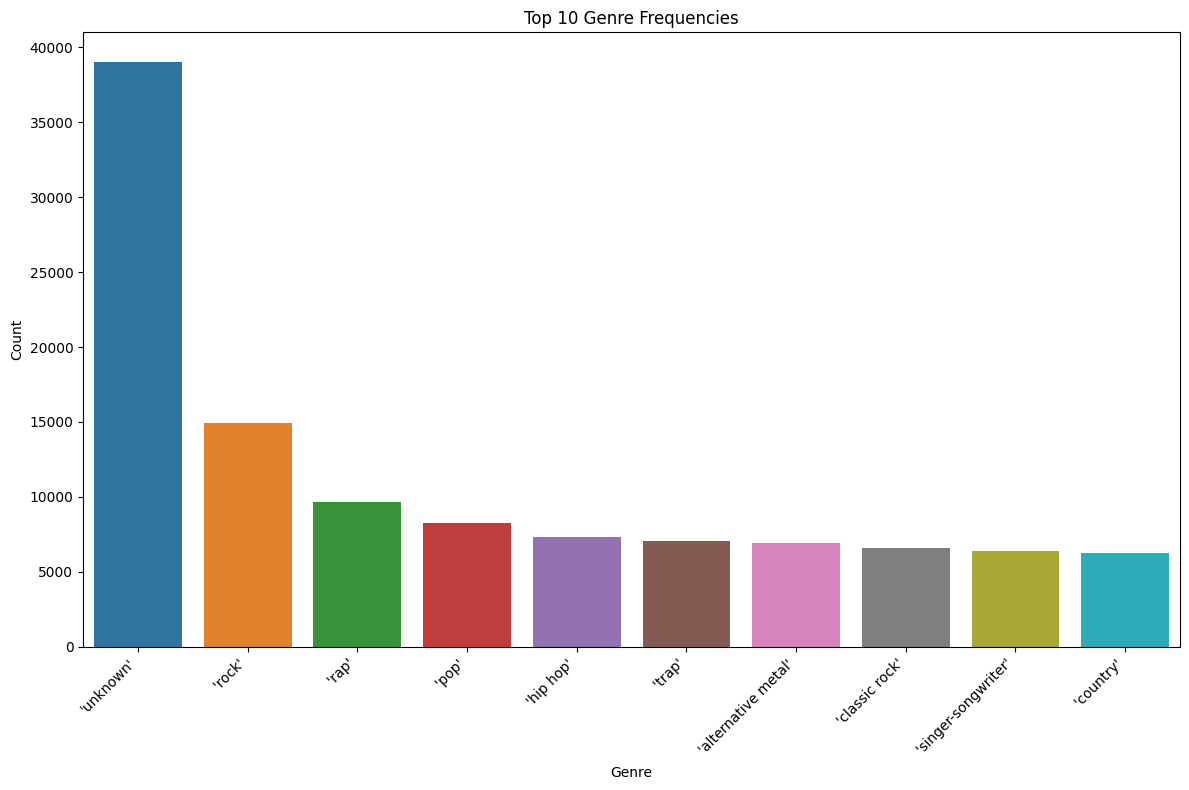

In [ ]:
# Trim whitespace and remove single quotes from the 'genres' column

tracks_df['genres'] = tracks_df['genres'].str.replace("\[|\]", "", regex=True)

# Split genres and explode the list
all_genres = tracks_df['genres'].str.split(',').explode()

# Count the frequency of each genre, excluding empty strings
genre_counts = all_genres[all_genres != ''].value_counts()

# Get top 10 genres
top_10_genres = genre_counts.head(10)

# Plot the top 10 genres
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Top 10 Genre Frequencies')
plt.tight_layout()
plt.show()


In [ ]:
merged_df.to_csv("/content/drive/MyDrive/Spotify_Data/merged_df.csv", index = False)


In [ ]:
tracks_df = tracks_df[['artist_name','track_id','track_name','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "artist_popularity", "genres", "release_year"]]

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import re
import ast

In [ ]:
def getSubjectivity(text):
  '''
  Getting the Subjectivity using TextBlob
  '''
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  '''
  Getting the Polarity using TextBlob
  '''
  return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):
  '''
  Categorizing the Polarity & Subjectivity score
  '''
  if task == "subjectivity":
    if score < 1/3:
      return "low"
    elif score > 1/3:
      return "high"
    else:
      return "medium"
  else:
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

def sentiment_analysis(df, text_col):
  '''
  Perform sentiment analysis on text
  ---
  Input:
  df (pandas dataframe): Dataframe of interest
  text_col (str): column of interest
  '''
  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x,"subjectivity"))
  df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)
  return df

In [ ]:
def ohe_prep(df, column, new_name):
    '''
    Create One Hot Encoded features of a specific column
    ---
    Input:
    df (pandas dataframe): Spotify Dataframe
    column (str): Column to be processed
    new_name (str): new column name to be used

    Output:
    tf_df: One-hot encoded features
    '''

    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)
    return tf_df

In [ ]:
sentiment = sentiment_analysis(tracks_df, "track_name")
subject_ohe = ohe_prep(sentiment, 'subjectivity','subject')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import ast

def create_feature_set(df, float_cols):
    '''
    Process Spotify df to create a final set of features that will be used to generate recommendations
    ---
    Input:
    df (pandas dataframe): Spotify DataFrame
    float_cols (list(str)): List of float columns that will be scaled

    Output:
    final (pandas dataframe): Final set of features
    '''

    # Tfidf genre lists
    tfidf = TfidfVectorizer(tokenizer=lambda x: ast.literal_eval(x), preprocessor=lambda x: ' '.join(x))
    tfidf_matrix = tfidf.fit_transform(df['genres'])

    # Apply Truncated SVD for dimensionality reduction
    svd = TruncatedSVD(n_components=200, random_state=42)
    genre_df_reduced = svd.fit_transform(tfidf_matrix)
    genre_df = pd.DataFrame(genre_df_reduced, columns=[f'genre_{i}' for i in range(200)])

    # Sentiment analysis
    df = sentiment_analysis(df, "track_name")

    # One-hot Encoding
    subject_ohe = ohe_prep(df, 'subjectivity','subject') * 0.3
    polar_ohe = ohe_prep(df, 'polarity','polar') * 0.5
    key_ohe = ohe_prep(df, 'key','key') * 0.5
    mode_ohe = ohe_prep(df, 'mode','mode') * 0.5

    # Normalization
    # Scale popularity columns
    pop = df[["artist_popularity"]].reset_index(drop=True)
    scaler = MinMaxScaler()
    pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns=pop.columns) * 0.2

    # Scale audio columns
    floats = df[float_cols].reset_index(drop=True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns=floats.columns) * 0.2

    # Bucketing the release year
    bucket_ranges = [1890, 1900, 1910, 1920, 1930 ,1940 ,1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
    release_year = pd.cut(df['release_year'], bins=bucket_ranges, labels=False)
    release_year = release_year.astype(int)
    # Concatenate all features
    final = pd.concat([floats_scaled, pop_scaled, subject_ohe, polar_ohe, key_ohe, mode_ohe, release_year, genre_df], axis=1)

    # Add song id
    final['track_id'] = df['track_id'].values

    return final


In [ ]:
merged_df.columns

Index(['pid', 'track_id', 'pos', 'num_followers', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'album_name', 'genres',
       'artist_popularity', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'name',
       'collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'num_artists'],
      dtype='object')

In [ ]:
float_cols = tracks_df.select_dtypes(include='float64').columns.values

In [ ]:
complete_feature_set = create_feature_set(tracks_df, float_cols=float_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
complete_feature_set.to_csv("/content/drive/MyDrive/Spotify_Data/complete_feature.csv", index = False)
complete_feature_set.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,genre_191,genre_192,genre_193,genre_194,genre_195,genre_196,genre_197,genre_198,genre_199,track_id
0,0.134410,0.1570,0.072727,0.171404,0.0,0.006370,0.019699,0.00396,0.0868,0.1098,...,-0.017322,-0.002829,-0.006961,-0.005651,0.014711,0.030474,-0.023572,0.017926,-0.011483,2209
1,0.104339,0.1410,0.109091,0.162509,0.0,0.075284,0.015080,0.00000,0.0256,0.1168,...,-0.008582,0.011242,-0.000979,-0.015904,-0.001937,0.004262,-0.001724,0.000253,-0.003794,27709
2,0.145308,0.1148,0.054545,0.160608,0.2,0.009369,0.000013,0.16640,0.0234,0.1302,...,-0.001125,0.015978,0.001797,-0.030611,0.001714,0.022700,0.001712,0.014215,-0.032359,2383
3,0.094652,0.1948,0.127273,0.178291,0.0,0.026887,0.013635,0.01894,0.0782,0.0272,...,-0.008582,0.011242,-0.000979,-0.015904,-0.001937,0.004262,-0.001724,0.000253,-0.003794,5177
4,0.109384,0.1956,0.145455,0.180710,0.0,0.025026,0.000349,0.13020,0.0051,0.0626,...,-0.009454,0.013020,-0.004110,-0.003613,-0.005536,0.029219,0.044580,-0.055978,0.015565,7784


In [ ]:
complete_feature_set = pd.read_csv('/content/drive/MyDrive/Spotify_Data/complete_feature.csv')


In [ ]:
playlistDF_test = playlists_df[playlists_df['pid']==10]

In [ ]:
ratingsDF_test = ratings_df[ratings_df['pid']==10]

In [ ]:
def generate_playlist_feature(complete_feature_set, playlist_df):
    '''
    Summarize a user's playlist into a single vector
    ---
    Input:
    complete_feature_set (pandas dataframe): Dataframe which includes all of the features for the spotify songs
    playlist_df (pandas dataframe): playlist dataframe

    Output:
    complete_feature_set_playlist_final (pandas series): single vector feature that summarizes the playlist
    complete_feature_set_nonplaylist (pandas dataframe):
    '''

    # Find song features in the playlist
    complete_feature_set_playlist = complete_feature_set[complete_feature_set['track_id'].isin(playlist_df['track_id'].values)]
    # Find all non-playlist song features
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['track_id'].isin(playlist_df['track_id'].values)]
    complete_feature_set_playlist_final = complete_feature_set_playlist.drop(columns = "track_id")
    return complete_feature_set_playlist_final.mean(axis=0), complete_feature_set_nonplaylist

In [ ]:
complete_feature_set_playlist_vector, complete_feature_set_nonplaylist = generate_playlist_feature(complete_feature_set, ratingsDF_test)

In [ ]:
def generate_playlist_recos(df, features, nonplaylist_features):
    '''
    Generated recommendation based on songs in aspecific playlist.
    ---
    Input:
    df (pandas dataframe): spotify dataframe
    features (pandas series): summarized playlist feature (single vector)
    nonplaylist_features (pandas dataframe): feature set of songs that are not in the selected playlist

    Output:
    non_playlist_df_top_40: Top 40 recommendations for that playlist
    '''

    non_playlist_df = df[df['track_id'].isin(nonplaylist_features['track_id'].values)]
    # Find cosine similarity between the playlist and the complete song set
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('track_id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_40 = non_playlist_df.sort_values('sim',ascending = False).head(10)

    return non_playlist_df_top_40

In [ ]:
merged_df_test = pd.merge(ratingsDF_test, tracks_df, on='track_id')
#merged_df_test.drop(columns=["Unnamed: 0"], inplace = True)
merged_df_test[['artist_name', 'track_name', 'genres', 'release_year']]

,artist_name,track_name,genres,release_year
0,Post Malone,Big Lie,"'dfw rap', 'melodic rap', 'pop', 'rap'",2016.0
1,Chance The Rapper,All We Got (feat. Kanye West & Chicago Childre...,"'chicago rap', 'conscious hip hop', 'hip hop',...",2016.0
2,Jeremih,Planez,"'chicago rap', 'pop rap', 'r&b', 'southern hip...",2015.0
3,Lil Wayne,Rich As Fuck,"'hip hop', 'new orleans rap', 'pop rap', 'rap'...",2013.0
4,Lupe Fiasco,The Show Goes On,"'chicago rap', 'conscious hip hop', 'hip hop',...",2011.0
...,...,...,...,...
67,Mike Stud,These Days,"'indie pop rap', 'rhode island rap'",2015.0
68,AJR,Drama,'pov: indie',2017.0
69,Mike Stud,Swish,"'indie pop rap', 'rhode island rap'",2016.0
70,AJR,Let the Games Begin,'pov: indie',2015.0


In [ ]:
recommend = generate_playlist_recos(tracks_df, complete_feature_set_playlist_vector, complete_feature_set_nonplaylist)
recommend[['artist_name', 'track_name', 'genres', 'release_year']]

<ipython-input-165-63f78f8f1e21>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('track_id', axis = 1).values, features.values.reshape(1, -1))[:,0]


,artist_name,track_name,genres,release_year
180535,Young Nudy,Shots Fired (feat. Kourtney Money),"'pluggnb', 'rap', 'trap'",2017.0
118204,YBN Nahmir,I Got A Stick,"'alabama rap', 'rap', 'trap'",2017.0
180528,Young Nudy,Loaded Baked Potato,"'pluggnb', 'rap', 'trap'",2017.0
263134,Bobby Shmurda,ZOE GOD,"'nyc rap', 'rap', 'trap'",2014.0
180529,Young Nudy,No Clue (feat. Lil Yachty),"'pluggnb', 'rap', 'trap'",2017.0
33206,Bobby Shmurda,Worldwide N*gga,"'nyc rap', 'rap', 'trap'",2014.0
87474,Bobby Shmurda,Living Life,"'nyc rap', 'rap', 'trap'",2014.0
21216,Sik World,7 Years (Remix),"'rap', 'sad rap'",2016.0
180526,Young Nudy,EA (feat. 21 Savage),"'pluggnb', 'rap', 'trap'",2017.0
185375,Bobby Shmurda,Wipe The Case Away,"'nyc rap', 'rap', 'trap'",2014.0
